# トライアングルアービトラージの戦略調査

In [ ]:
conf_ = {"host": "localhost",
         "port": 27017,
         "username": "root",
         "password": "example"
         }

In [510]:
from pymongo import MongoClient
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

client = MongoClient(host=conf_["host"], port=conf_["port"], username=conf_["username"], password=conf_["password"])
db = client['ticker']


In [511]:
start="2022-09-14 12:00"
end="2022-09-14 15:00"

In [512]:
co_BTC_JPY = db['BTC_JPY']
df_BJ = pd.DataFrame(co_BTC_JPY.find())
df_BJ['timestamp']=pd.to_datetime(df_BJ['timestamp'], utc=True)
df_BJ['timestamp']=df_BJ['timestamp'].dt.tz_convert('Asia/Tokyo')
df_BJ=df_BJ.drop_duplicates(subset='timestamp').set_index('timestamp').sort_index(axis=0)
df_BJ=df_BJ.asfreq('500L', method='ffill')
df_BJ.index=df_BJ.index.round('500L')
df_BJ=df_BJ[start:end]

In [513]:
co_ETH_BTC = db['ETH_BTC']
df_EB = pd.DataFrame(co_ETH_BTC.find())
df_EB['timestamp']=pd.to_datetime(df_EB['timestamp'], utc=True)
df_EB['timestamp']=df_EB['timestamp'].dt.tz_convert('Asia/Tokyo')
df_EB=df_EB.drop_duplicates(subset='timestamp').set_index('timestamp').sort_index(axis=0)
df_EB=df_EB.asfreq("0.5S", method='ffill')
df_EB.index=df_EB.index.round('500L')
df_EB=df_EB[start:end]

In [514]:
co_ETH_JPY = db['ETH_JPY']
df_EJ = pd.DataFrame(co_ETH_JPY.find())
df_EJ['timestamp']=pd.to_datetime(df_EJ['timestamp'], utc=True)
df_EJ['timestamp']=df_EJ['timestamp'].dt.tz_convert('Asia/Tokyo')
df_EJ=df_EJ.drop_duplicates(subset='timestamp').set_index('timestamp').sort_index(axis=0)
df_EJ=df_EJ.asfreq("0.5S", method='ffill')
df_EJ.index=df_EJ.index.round('500L')
df_EJ=df_EJ[start:end]

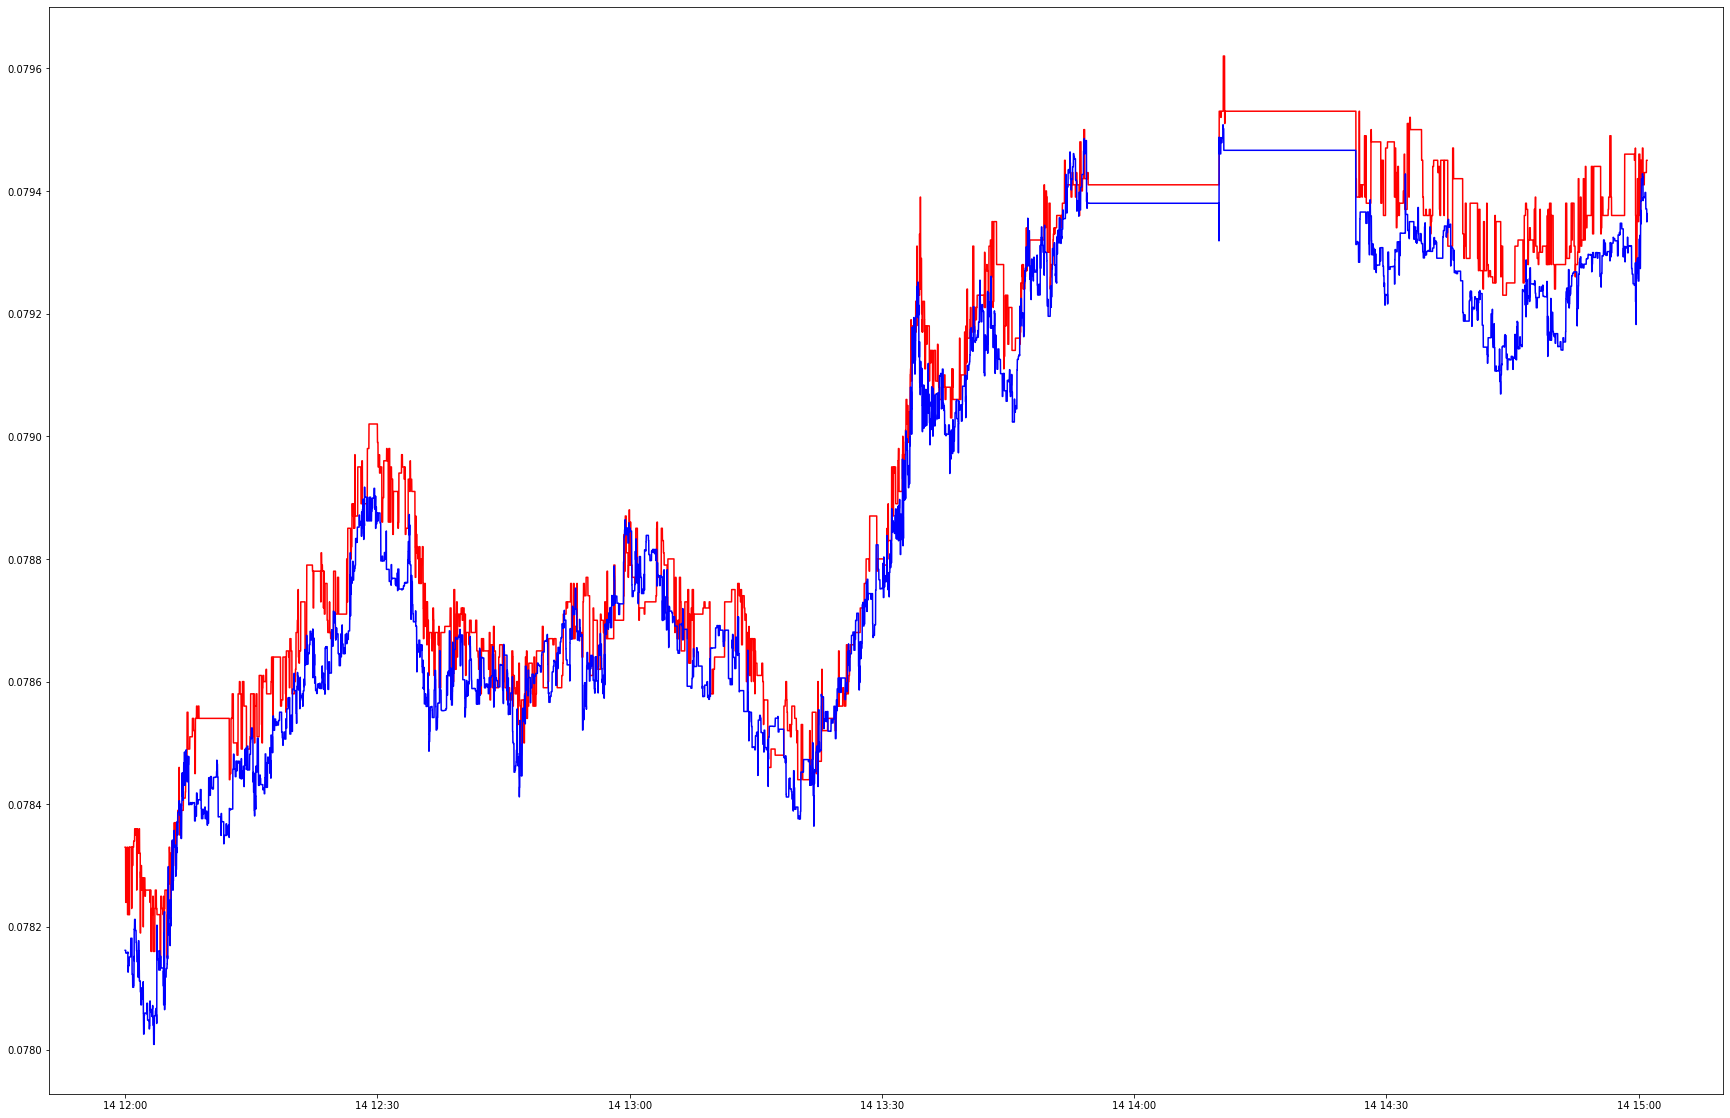

In [515]:
plt.figure(figsize=(30,20))
plt.plot(df_EB.index, df_EB['ltp'], color='red')
plt.plot(df_BJ.index, df_EJ['ltp']/df_BJ['ltp'], color='blue')
plt.show()